#### Importing Libraries

In [26]:
# Import TensorFlow and Keras packages
import tensorflow as tf  # Imports the TensorFlow library and gives it the alias 'tf' for easier access

# Importing Keras modules from TensorFlow
from tensorflow.keras.models import Sequential  # Imports the Sequential model, allowing us to stack layers sequentially
from tensorflow.keras.layers import Dense, Flatten  # Imports Dense and Flatten layers:
                                                   # - Dense: A fully connected neural network layer
                                                   # - Flatten: Converts multi-dimensional input into a 1D vector

# Importing the Stochastic Gradient Descent (SGD) optimizer
from tensorflow.keras.optimizers import SGD  # SGD is an optimization algorithm for training, adjusting weights to reduce error

# Importing matplotlib for data visualization
import matplotlib.pyplot as plt  # 'plt' is a common alias for matplotlib.pyplot, useful for plotting data and images


#### b. Load the Training and Testing Data (MNIST/CIFAR10)

In [27]:
# Set dataset to 'mnist' or 'cifar10'
DATASET = 'mnist'  # Defines the dataset to use: 'mnist' (handwritten digits) or 'cifar10' (color images of objects)

# Load dataset
if DATASET == 'mnist':
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Loads MNIST dataset (28x28 grayscale images)
    input_shape = (28, 28)  # Sets the input shape for MNIST images (height, width)
    num_classes = 10  # Defines the number of output classes (0-9 digits)
elif DATASET == 'cifar10':
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()  # Loads CIFAR-10 dataset (32x32 color images)
    input_shape = (32, 32, 3)  # Sets the input shape for CIFAR-10 images (height, width, color channels)
    num_classes = 10  # Defines the number of output classes (10 categories)

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0  # Scales pixel values from [0, 255] to [0, 1] for faster training

# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)  # Converts labels to one-hot format (e.g., 3 -> [0, 0, 0, 1, ...])
y_test = tf.keras.utils.to_categorical(y_test, num_classes)  # Same for test labels


In [17]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

#### Define the Network Architechture Using Keras

In [28]:
# Define the feedforward neural network architecture
model = Sequential([                  # Initializes a Sequential model (layers are stacked in sequence)
    Flatten(input_shape=input_shape),  # Flattens the input to a 1D vector (e.g., 28x28 image to 784 for MNIST)
    Dense(128, activation='relu'),     # Adds a dense (fully connected) layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),      # Adds another dense layer with 64 neurons and ReLU activation
    Dense(num_classes, activation='softmax')  # Output layer with neurons equal to the number of classes
                                             # and softmax activation for multi-class classification
])

# Compile the model using SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.01),          # Specifies SGD optimizer with a learning rate of 0.01
              loss='categorical_crossentropy',            # Uses categorical cross-entropy as the loss function (for multi-class classification)
              metrics=['accuracy'])                       # Tracks accuracy as a metric during training and evaluation


#### Train the Model Using SGD

In [29]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32,   # Starts the training process
                    validation_data=(x_test, y_test))              # Uses x_test and y_test for validation during training


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6219 - accuracy: 0.8352 - val_loss: 0.3185 - val_accuracy: 0.9080
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2913 - accuracy: 0.9154 - val_loss: 0.2495 - val_accuracy: 0.9287
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2402 - accuracy: 0.9299 - val_loss: 0.2151 - val_accuracy: 0.9371
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2073 - accuracy: 0.9402 - val_loss: 0.1908 - val_accuracy: 0.9429
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1820 - accuracy: 0.9477 - val_loss: 0.1680 - val_accuracy: 0.9500
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1625 - accuracy: 0.9529 - val_loss: 0.1523 - val_accuracy: 0.9529
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1460 - accuracy: 0.9580 - val_loss: 0.1434 - val_accuracy:

#### Evaluate The Network

In [31]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)  # Evaluates the model's performance on the test dataset (x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")  # Prints the test accuracy, formatted to 4 decimal places


313/313 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9643
Test accuracy: 0.9643


#### Plot the training loss and accuracy 

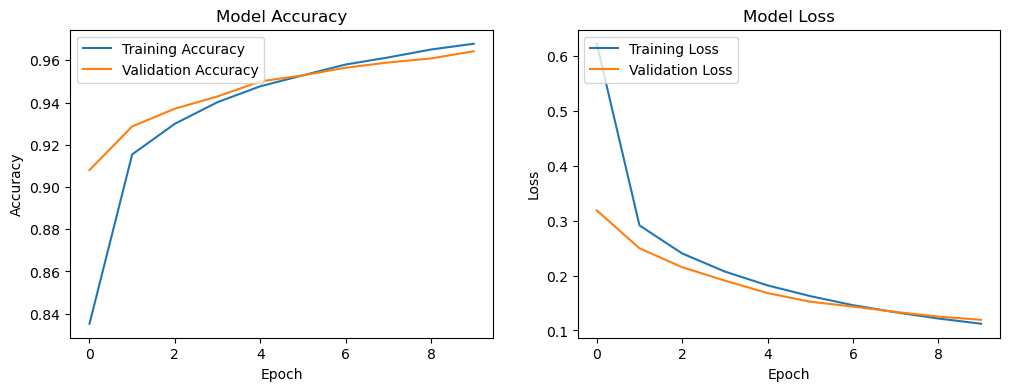

In [32]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))  # Create a figure with a size of 12x4 inches

# Plot accuracy
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, first subplot)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy over epochs
plt.title('Model Accuracy')  # Set the title of the first subplot
plt.xlabel('Epoch')  # Label the x-axis (epochs)
plt.ylabel('Accuracy')  # Label the y-axis (accuracy)
plt.legend(loc='upper left')  # Display the legend in the upper left corner

# Plot loss
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, second subplot)
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss over epochs
plt.title('Model Loss')  # Set the title of the second subplot
plt.xlabel('Epoch')  # Label the x-axis (epochs)
plt.ylabel('Loss')  # Label the y-axis (loss)
plt.legend(loc='upper left')  # Display the legend in the upper left corner

plt.show()  # Show the plotted figures


In [1]:
# Theory
Here are the key theory points related to the code you provided, which could potentially be asked by an examiner during your oral examination:

### 1. **Epoch**
   - **Definition**: An **epoch** is one complete forward and backward pass of all the training data through the neural network. It represents one full iteration over the entire training dataset.
   - **Significance**: More epochs typically lead to better model performance as the model gets more opportunities to learn from the data. However, too many epochs can lead to overfitting (when the model learns the noise in the training data rather than generalizable patterns).
   - **Question**: *What is an epoch in neural network training? How does increasing the number of epochs affect the model?*

### 2. **Batch Size**
   - **Definition**: The **batch size** is the number of samples used in one forward and backward pass. The model's weights are updated after each batch.
   - **Significance**: A smaller batch size makes the model update weights more frequently, but a larger batch size leads to more stable but slower updates.
   - **Question**: *What is batch size, and how does it influence the training process?*

### 3. **ReLU (Rectified Linear Unit)**
   - **Definition**: ReLU is an activation function that outputs the input directly if it is positive, otherwise, it outputs zero. Mathematically, `f(x) = max(0, x)`.
   - **Significance**: ReLU is widely used in hidden layers of neural networks because it helps with non-linearity and reduces the likelihood of the vanishing gradient problem (where gradients become too small for learning to continue effectively).
   - **Question**: *What is the ReLU activation function? Why is it preferred in deep neural networks?*

### 4. **Softmax Activation**
   - **Definition**: **Softmax** is an activation function used in the output layer of classification models to normalize the output of the model to represent a probability distribution across multiple classes. It converts the logits (raw model outputs) into probabilities.
   - **Mathematically**: For a vector `z = [z1, z2, ..., zn]`, softmax is given by:  
     \[
     \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
     \]
   - **Significance**: Softmax is commonly used for multi-class classification tasks because it ensures that the output values sum up to 1, and each output can be interpreted as the probability of the model's prediction for each class.
   - **Question**: *What is softmax, and why is it used in the output layer of a multi-class classification neural network?*

### 5. **Categorical Cross-Entropy Loss**
   - **Definition**: **Categorical cross-entropy** is a loss function commonly used for multi-class classification problems. It compares the predicted probability distribution (from softmax) with the true class distribution (one-hot encoded labels).
   - **Mathematically**:
     \[
     \text{Loss} = -\sum_{i=1}^{C} y_i \log(p_i)
     \]
     where `y_i` is the true label, `p_i` is the predicted probability, and `C` is the number of classes.
   - **Significance**: The goal is to minimize the categorical cross-entropy loss, meaning the model’s predicted probabilities should closely match the true labels.
   - **Question**: *What is categorical cross-entropy loss? How does it work in multi-class classification?*

### 6. **SGD (Stochastic Gradient Descent) Optimizer**
   - **Definition**: **SGD** is an optimization algorithm used to minimize the loss function. It updates the weights in the direction of the negative gradient of the loss function with respect to the weights. It is called "stochastic" because it uses only a small random subset (batch) of the data to compute the gradient, rather than the entire dataset.
   - **Significance**: SGD is efficient for large datasets, as it updates weights more frequently compared to traditional gradient descent.
   - **Variants**: There are many variants of SGD like **Momentum**, **Adam**, etc., which aim to improve convergence speed and stability.
   - **Question**: *What is Stochastic Gradient Descent (SGD)? Why is it used in neural networks?*

### 7. **Training vs. Validation Data**
   - **Training Data**: The data used to train the model and adjust the weights. The model learns patterns from the training data.
   - **Validation Data**: The data that the model does not see during training. It is used to evaluate the model’s performance during training and to detect overfitting.
   - **Significance**: Monitoring validation performance helps ensure that the model generalizes well to unseen data and is not just memorizing the training data.
   - **Question**: *What is the difference between training data and validation data? Why is validation data important?*

### 8. **Overfitting**
   - **Definition**: **Overfitting** occurs when the model learns the noise and details in the training data to the extent that it negatively impacts the performance of the model on new data.
   - **Symptoms**: The model performs well on the training data but poorly on the validation/test data.
   - **Prevention**: Regularization techniques, dropout, and using more training data are common methods to prevent overfitting.
   - **Question**: *What is overfitting in machine learning? How can it be prevented?*

### 9. **Underfitting**
   - **Definition**: **Underfitting** happens when the model is too simple or has not been trained enough to capture the underlying patterns in the data.
   - **Symptoms**: The model performs poorly on both training and test data.
   - **Prevention**: Increasing model complexity (e.g., adding more layers or neurons), improving feature engineering, or training for more epochs can help avoid underfitting.
   - **Question**: *What is underfitting in machine learning? What causes it, and how can it be prevented?*

### 10. **Accuracy**
   - **Definition**: **Accuracy** is the proportion of correct predictions (both true positives and true negatives) over the total number of predictions.
   - **Significance**: Accuracy is a common metric for classification tasks but may not always be reliable, especially when dealing with imbalanced classes (where some classes have much fewer examples than others).
   - **Question**: *What is accuracy, and how is it calculated in classification problems?*

### 11. **Loss Function**
   - **Definition**: A **loss function** (or cost function) is a mathematical function that quantifies the difference between the predicted output and the actual output (true labels). It is used to evaluate how well the model's predictions match the actual data.
   - **Examples**: Common loss functions include **mean squared error** for regression, and **categorical cross-entropy** for classification.
   - **Question**: *What is a loss function? Can you give examples of loss functions used in classification tasks?*

### 12. **Why Use Softmax with Categorical Cross-Entropy?**
   - **Explanation**: Softmax is used in the output layer to convert raw output values (logits) into a probability distribution, while categorical cross-entropy measures the difference between the predicted probabilities and the true labels. Together, they make the model output probabilities and use a loss function suitable for classification tasks.
   - **Question**: *Why is the softmax activation function used in the output layer for classification problems? Why is it paired with categorical cross-entropy?*

### 13. **Visualization of Training History**
   - **Explanation**: Plotting the training and validation accuracy/loss helps to visualize the model's learning progress. It also helps identify problems like overfitting or underfitting.
   - **Question**: *Why do we plot training vs. validation accuracy/loss? What insights can be drawn from such plots?*

### Summary of Possible Questions:
- What is an epoch and how does it affect training?
- What is the purpose of the ReLU activation function?
- Why is softmax used in the output layer for multi-class classification?
- What is categorical cross-entropy and why is it used?
- Explain Stochastic Gradient Descent and why it's used.
- What are the differences between training and validation data?
- What is overfitting and how can it be prevented?
- What is the difference between accuracy and loss in training?
- Why do we use softmax and categorical cross-entropy together in multi-class classification?

Let me know if you need additional explanations or practice with answering these!



In [ ]:
Certainly! Here are some additional theory points and concepts that may come up during your oral examination, beyond the ones I previously mentioned:

### 1. **Gradient Descent (General Concept)**
   - **Definition**: Gradient Descent is an optimization algorithm used to minimize the loss function. The algorithm updates the weights by calculating the gradient of the loss function with respect to each weight and adjusting the weights in the direction that reduces the loss.
   - **Types**: 
     - **Batch Gradient Descent**: Uses the entire dataset to compute the gradient and update the weights.
     - **Stochastic Gradient Descent (SGD)**: Uses only one data point to compute the gradient and update the weights, making it faster but noisier.
     - **Mini-batch Gradient Descent**: A compromise between batch and stochastic, using a subset (mini-batch) of the data to compute the gradient.
   - **Question**: *What is Gradient Descent? How does Stochastic Gradient Descent differ from Batch Gradient Descent?*

### 2. **Learning Rate**
   - **Definition**: The **learning rate** is a hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function. It controls how big or small the changes to the weights should be.
   - **Significance**: A **too high** learning rate can lead to overshooting the optimal point, while a **too low** learning rate can make the learning process very slow or cause it to get stuck in local minima.
   - **Question**: *What is the learning rate in optimization? How does it affect the convergence of the model?*

### 3. **Activation Functions (General)**
   - **Definition**: An **activation function** is a mathematical function applied to each neuron’s output in a neural network. It determines whether the neuron should be activated (i.e., contribute to the output of the next layer).
   - **Types**:
     - **Sigmoid**: Outputs values between 0 and 1, often used in binary classification.
     - **Tanh**: Outputs values between -1 and 1, and is centered around zero.
     - **ReLU**: As mentioned before, outputs the input if it's positive, otherwise, it outputs zero.
     - **Leaky ReLU**: A modified version of ReLU that allows small negative values when the input is less than zero.
   - **Question**: *What are the different types of activation functions, and where are they typically used?*

### 4. **Overfitting vs. Underfitting**
   - **Overfitting**: Occurs when the model is too complex and captures noise in the training data, leading to high performance on the training set but poor generalization to new data.
   - **Underfitting**: Happens when the model is too simple to capture the underlying patterns in the data, leading to poor performance on both the training and test sets.
   - **How to Prevent**:
     - **Overfitting**: Use regularization (L2, L1), dropout, early stopping, and gather more data.
     - **Underfitting**: Increase model complexity, use better features, or train for more epochs.
   - **Question**: *What is the difference between overfitting and underfitting? How do you prevent each?*

### 5. **Dropout Regularization**
   - **Definition**: **Dropout** is a regularization technique where, during training, random neurons are "dropped" (set to zero) to prevent overfitting.
   - **Significance**: Dropout helps prevent the model from becoming overly dependent on certain neurons, forcing it to learn more robust features.
   - **Question**: *What is dropout in neural networks? How does it help prevent overfitting?*

### 6. **Convolutional Neural Networks (CNNs) Overview**
   - **Definition**: **CNNs** are a class of deep neural networks used for image processing tasks. They are specifically designed to process data that has a grid-like topology (e.g., images, which have height, width, and depth).
   - **Components**:
     - **Convolutional layers**: Use filters (kernels) to extract features from the input image.
     - **Pooling layers**: Reduce the spatial dimensions of the data (e.g., max pooling).
     - **Fully connected layers**: After convolution and pooling, the high-level features are flattened and passed through fully connected layers for classification or regression.
   - **Question**: *What are Convolutional Neural Networks (CNNs)? What types of layers do they contain?*

### 7. **Early Stopping**
   - **Definition**: **Early stopping** is a regularization technique where training is halted once the model’s performance on a validation set starts deteriorating (i.e., the validation loss begins to increase), even if the training loss continues to decrease.
   - **Significance**: It helps prevent overfitting by stopping training before the model learns noise in the training data.
   - **Question**: *What is early stopping in neural network training? How does it help to avoid overfitting?*

### 8. **Weight Initialization**
   - **Definition**: The initial values of weights in a neural network can significantly impact training. Poor initialization can lead to slower convergence or getting stuck in local minima.
   - **Methods**:
     - **Random Initialization**: Weights are initialized randomly (e.g., using a Gaussian distribution).
     - **Xavier/Glorot Initialization**: Scales the weights based on the number of input and output neurons, ensuring that the variance of the outputs is the same as the variance of the inputs.
     - **He Initialization**: Similar to Xavier but designed to work better with ReLU activation functions.
   - **Question**: *What is the significance of weight initialization in neural networks? Name some common methods for initializing weights.*

### 9. **Hyperparameters in Neural Networks**
   - **Definition**: **Hyperparameters** are settings that are not learned from the data but set manually before training. Examples include the learning rate, batch size, number of layers, number of neurons in each layer, and the number of epochs.
   - **Question**: *What are hyperparameters in a neural network? Can you give some examples? How do you tune them?*

### 10. **Confusion Matrix (Related to Classification Models)**
   - **Definition**: A **confusion matrix** is a table used to evaluate the performance of a classification model by comparing predicted labels to actual labels.
   - **Components**:
     - **True Positives (TP)**: Correctly predicted positive class.
     - **True Negatives (TN)**: Correctly predicted negative class.
     - **False Positives (FP)**: Incorrectly predicted as positive.
     - **False Negatives (FN)**: Incorrectly predicted as negative.
   - **Question**: *What is a confusion matrix? How do you interpret it?*

### 11. **Precision, Recall, and F1-Score**
   - **Precision**: The fraction of true positive predictions among all positive predictions. 
   - **Recall**: The fraction of true positive predictions among all actual positive instances.
   - **F1-Score**: The harmonic mean of precision and recall, providing a single metric that balances the two.
   - **Significance**: Useful for imbalanced classification problems where accuracy may not be the best metric.
   - **Question**: *What are precision, recall, and F1-score? Why are they important?*

### 12. **Hyperparameter Tuning (Grid Search, Random Search, Bayesian Optimization)**
   - **Definition**: Hyperparameter tuning refers to the process of selecting the best combination of hyperparameters (like learning rate, batch size, number of layers, etc.) to optimize model performance.
   - **Methods**:
     - **Grid Search**: Exhaustively searches through a manually specified subset of hyperparameters.
     - **Random Search**: Randomly samples hyperparameter combinations from a specified range.
     - **Bayesian Optimization**: Uses probability models to find the most promising hyperparameters based on previous trials.
   - **Question**: *What is hyperparameter tuning, and how can it be performed?*

---

### Additional Possible Questions:

- **What is a neural network? How does it work?**
- **What is a fully connected layer?**
- **What is the difference between a shallow and deep neural network?**
- **What is the purpose of the validation set?**
- **How does the model learn from data during training?**
- **What is the purpose of an optimizer in neural networks?**
- **What is the vanishing gradient problem? How can it be mitigated?**

These are some additional concepts that are relevant to your code and model training process. Being prepared to answer questions about these concepts will help you in your oral examination. Let me know if you need any further clarifications!